In [2]:
!conda install -c maciejkula -c pytorch spotlight -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/vineethchitturi/opt/anaconda3/envs/my36

  added / updated specs:
    - spotlight


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36h9ed2024_1003         332 KB
    charset-normalizer-2.0.4   |     pyhd3eb1b0_0          35 KB
    cryptography-35.0.0        |   py36h2fd3fbb_0         1.1 MB
    h5py-2.10.0                |   py36h0601b69_1         788 KB
    hdf5-1.10.6                |       hdbbcd12_0         3.0 MB
    idna-3.3                   |     pyhd3eb1b0_0          49 KB
    intel-openmp-2022.0.0      |    hecd8cb5_3615         971 KB
    llvm-openmp-12.0.0         |       h0dcd29

## Prediction using ExplicitFactorization model

### Explicit Factorization model uses the matrix factorization approach to recommend books

#### Spotlight fits models such as these using stochastic gradient descent. The procedure goes roughly as follows:
Start with representing users and items by randomly chosen vectors. Because they are random, they are not going to give useful recommendations, but we are going to improve them as we fit the model.
Go through the (user, item, rating) triplets in the dataset. For every triplet, compute the rating that the model predicts by multiplying the user and item vectors together, and compare the result with the actual rating: the closer they are, the better the model.
If the predicted rating is too low, adjust the user and item vectors (by a small amount) to increase the prediction.
If the predicted rating is too high, adjust the vectors to decrease it.
Continue iterating over the training triplets until the model's accuracy stabilizes.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
ratings_data = pd.read_csv('goodreads_interactions.csv')


In [41]:
ratings_data

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0
...,...,...,...,...,...
228648337,876144,24772,0,0,0
228648338,876144,23847,1,4,0
228648339,876144,23950,1,3,0
228648340,876144,374106,1,5,1


/Users/vineethchitturi/opt/anaconda3/envs/my36/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/vineethchitturi/opt/anaconda3/envs/my36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


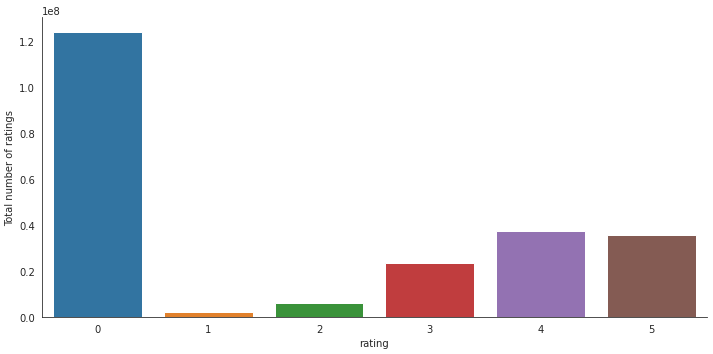

In [75]:
import seaborn as sns
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=ratings_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [42]:
ratings_nonZero = ratings_data[ratings_data['rating']!=0]

In [64]:
ratings_nonZero['user_id'][10000]

14

In [65]:
print(ratings_nonZero)

           user_id  book_id  is_read  rating  is_reviewed
0                0      948        1       5            0
1                0      947        1       5            1
2                0      946        1       5            0
3                0      945        1       5            0
4                0      944        1       5            0
...            ...      ...      ...     ...          ...
228648336   876144   367428        1       3            0
228648338   876144    23847        1       4            0
228648339   876144    23950        1       3            0
228648340   876144   374106        1       5            1
228648341   876144   351607        1       5            1

[104551549 rows x 5 columns]


In [66]:
ratings_info = ratings_nonZero

In [67]:
ratings_info.dtypes
data = ratings_info.astype({'rating':'float32'})

In [68]:
data.dtypes

user_id          int64
book_id          int64
is_read          int64
rating         float32
is_reviewed      int64
dtype: object

In [69]:
from spotlight.interactions import Interactions

dataset = Interactions(user_ids=data['user_id'].values,
                       item_ids=data['book_id'].values,
                       ratings=data['rating'].values)

In [70]:
from spotlight.cross_validation import random_train_test_split
from spotlight.evaluation import rmse_score
from spotlight.factorization.explicit import ExplicitFactorizationModel
train, test = random_train_test_split(dataset)
model = ExplicitFactorizationModel(n_iter=10)
model.fit(train, verbose=True)
rmse = rmse_score(model, test)
print('RMSE = ', rmse)

Epoch 0: loss 4.1048024316209295
Epoch 1: loss 0.7531720978361021
Epoch 2: loss 0.4493607756653735
Epoch 3: loss 0.43558283686942956
Epoch 4: loss 0.4322004592807645
Epoch 5: loss 0.42319475759776526
Epoch 6: loss 0.41207208621219726
Epoch 7: loss 0.4061608446269789
Epoch 8: loss 0.4022619405657682
Epoch 9: loss 0.40103239606605917
RMSE =  1.040621


In [71]:
model.fit(train, verbose=True)
rmse = rmse_score(model, test)
print('RMSE = ', rmse)

Epoch 0: loss 0.4013270934232137
Epoch 1: loss 0.4012019289317836
Epoch 2: loss 0.40064237263442154
Epoch 3: loss 0.40124377072505746
Epoch 4: loss 0.4020382874262157
Epoch 5: loss 0.40336399467725137
Epoch 6: loss 0.40431390917232535
Epoch 7: loss 0.4066787916387569
Epoch 8: loss 0.4064314220093491
Epoch 9: loss 0.4083918179561142
RMSE =  1.0512996


In [72]:
model.fit(train, verbose=True)
rmse = rmse_score(model, test)
print('RMSE = ', rmse)

Epoch 0: loss 0.40822985316421156
Epoch 1: loss 0.40859880873734417
Epoch 2: loss 0.4097377682487246
Epoch 3: loss 0.4126291507837182
Epoch 4: loss 0.4126059036184715
Epoch 5: loss 0.4110193254470215
Epoch 6: loss 0.41355981887035165
Epoch 7: loss 0.4127636159450216
Epoch 8: loss 0.41514005736517584
Epoch 9: loss 0.41599475933204305
RMSE =  1.0610305
